# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
import urllib.error
from urllib.error import HTTPError

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

In [3]:
# create lists to store city weather information

city_name = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []



In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

count = 1

#for city in cities:
for city in cities: 
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_request = requests.get(query_url)
    print(f"Processing request {count} in Set 1 | {city}")
    
    try:
        weather_request.raise_for_status()
        weather_data = weather_request.json()
        city_name.append(weather_data['name'])
        max_temp.append(weather_data['main']['temp_max'])
        humidity.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speed.append(weather_data['wind']['speed'])
        lat.append(weather_data['coord']['lat'])
        lng.append(weather_data['coord']['lon'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        
    except requests.HTTPError:
        print("City not found. Skipping...")
    count +=1



Processing request 1 in Set 1 | cherskiy
Processing request 2 in Set 1 | barrow
Processing request 3 in Set 1 | hobart
Processing request 4 in Set 1 | kapaa
Processing request 5 in Set 1 | busselton
Processing request 6 in Set 1 | ratnagiri
Processing request 7 in Set 1 | sentyabrskiy
City not found. Skipping...
Processing request 8 in Set 1 | narsaq
Processing request 9 in Set 1 | asau
Processing request 10 in Set 1 | ushuaia
Processing request 11 in Set 1 | new norfolk
Processing request 12 in Set 1 | port alfred
Processing request 13 in Set 1 | ust-charyshskaya pristan
Processing request 14 in Set 1 | vostok
Processing request 15 in Set 1 | presidencia roque saenz pena
Processing request 16 in Set 1 | springbok
Processing request 17 in Set 1 | nome
Processing request 18 in Set 1 | barentsburg
City not found. Skipping...
Processing request 19 in Set 1 | longyearbyen
Processing request 20 in Set 1 | dikson
Processing request 21 in Set 1 | rikitea
Processing request 22 in Set 1 | matau

Processing request 184 in Set 1 | pinyug
Processing request 185 in Set 1 | taikang
Processing request 186 in Set 1 | madang
Processing request 187 in Set 1 | colonial park
Processing request 188 in Set 1 | hami
Processing request 189 in Set 1 | trairi
Processing request 190 in Set 1 | guerrero negro
Processing request 191 in Set 1 | mar del plata
Processing request 192 in Set 1 | coxim
Processing request 193 in Set 1 | victoria
Processing request 194 in Set 1 | vila franca do campo
Processing request 195 in Set 1 | pirot
Processing request 196 in Set 1 | the pas
Processing request 197 in Set 1 | albany
Processing request 198 in Set 1 | gao
Processing request 199 in Set 1 | khasan
Processing request 200 in Set 1 | huangyan
Processing request 201 in Set 1 | namtsy
Processing request 202 in Set 1 | fortuna
Processing request 203 in Set 1 | jardim
Processing request 204 in Set 1 | takaka
Processing request 205 in Set 1 | lagoa
Processing request 206 in Set 1 | launceston
Processing request

Processing request 367 in Set 1 | diffa
Processing request 368 in Set 1 | tessalit
Processing request 369 in Set 1 | araouane
Processing request 370 in Set 1 | andros town
Processing request 371 in Set 1 | panguipulli
Processing request 372 in Set 1 | japura
Processing request 373 in Set 1 | korla
Processing request 374 in Set 1 | saint-joseph
Processing request 375 in Set 1 | vao
Processing request 376 in Set 1 | lata
Processing request 377 in Set 1 | hasaki
Processing request 378 in Set 1 | langsa
Processing request 379 in Set 1 | nampa
Processing request 380 in Set 1 | kerteh
City not found. Skipping...
Processing request 381 in Set 1 | oranjemund
Processing request 382 in Set 1 | great yarmouth
Processing request 383 in Set 1 | grand-lahou
Processing request 384 in Set 1 | aberdeen
Processing request 385 in Set 1 | calhoun
Processing request 386 in Set 1 | san lawrenz
Processing request 387 in Set 1 | adrar
Processing request 388 in Set 1 | mica
Processing request 389 in Set 1 | va

Processing request 543 in Set 1 | supe
Processing request 544 in Set 1 | cockburn town
Processing request 545 in Set 1 | jumla
Processing request 546 in Set 1 | opuwo
Processing request 547 in Set 1 | maldonado
Processing request 548 in Set 1 | ginda
Processing request 549 in Set 1 | mount gambier
Processing request 550 in Set 1 | deputatskiy
Processing request 551 in Set 1 | rolim de moura
City not found. Skipping...
Processing request 552 in Set 1 | kefalos
Processing request 553 in Set 1 | rantepao
Processing request 554 in Set 1 | asilah
Processing request 555 in Set 1 | najran
Processing request 556 in Set 1 | timra
Processing request 557 in Set 1 | tawkar
City not found. Skipping...
Processing request 558 in Set 1 | limbdi
Processing request 559 in Set 1 | iralaya
Processing request 560 in Set 1 | bograd
Processing request 561 in Set 1 | morros
Processing request 562 in Set 1 | huancavelica
Processing request 563 in Set 1 | iranshahr
Processing request 564 in Set 1 | tarko-sale
P

In [6]:
weather_df = pd.DataFrame({
    'city': city_name,
    'max_temp' : max_temp,
    'humidity' : humidity,
    'wind_speed': wind_speed,
    'cloudiness': cloudiness,
    'lat': lat,
    'lng': lng,
    'country': country,
    'date': date
})

weather_df

,city,max_temp,humidity,wind_speed,cloudiness,lat,lng,country,date
0,Cherskiy,46.33,59,4.68,71,68.7500,161.3000,RU,1629149606
1,Barrow,37.42,75,23.02,90,71.2906,-156.7887,US,1629149606
2,Hobart,46.26,68,3.00,75,-42.8794,147.3294,AU,1629149405
3,Kapaa,84.52,67,5.01,1,22.0752,-159.3190,US,1629149607
4,Busselton,51.08,71,5.06,9,-33.6500,115.3333,AU,1629149607
...,...,...,...,...,...,...,...,...,...
524,Abomey,73.15,85,7.20,100,7.1829,1.9912,BJ,1629149757
525,Qasigiannguit,46.65,91,5.08,100,68.8193,-51.1922,GL,1629149757
526,China,98.64,29,5.99,2,25.7000,-99.2333,MX,1629149678
527,Balabac,81.34,75,4.27,66,7.9868,117.0645,PH,1629149757


In [7]:
weather_df.describe()

,max_temp,humidity,wind_speed,cloudiness,lat,lng,date
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,5.290000e+02
mean,69.098563,72.391304,7.560548,55.103970,19.012363,18.588926,1.629150e+09
std,14.175388,20.126118,5.240011,38.276241,33.502708,91.102026,7.803929e+01
min,33.940000,9.000000,0.000000,0.000000,-54.800000,-175.200000,1.629149e+09
25%,58.730000,64.000000,3.830000,15.000000,-8.650000,-63.057800,1.629150e+09
50%,70.660000,77.000000,6.510000,69.000000,22.813400,24.666700,1.629150e+09
75%,80.150000,87.000000,10.360000,91.000000,46.366700,99.511700,1.629150e+09
max,108.210000,100.000000,35.790000,100.000000,78.218600,179.316700,1.629150e+09


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df.to_csv('output_data/weather_data.csv')

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity_100 = weather_df.loc[weather_df['humidity'] == 100]
humidity_100

,city,max_temp,humidity,wind_speed,cloudiness,lat,lng,country,date
60,Iqaluit,40.73,100,17.27,90,63.7506,-68.5145,CA,1629149622
68,Labuan,75.56,100,0.00,20,5.2767,115.2417,MY,1629149625
270,Luang Prabang,72.54,100,0.94,100,19.8856,102.1347,LA,1629149681
433,Gornje Dubrave,64.29,100,1.14,0,44.4717,18.7122,BA,1629149729
501,Mount Gambier,46.31,100,5.75,90,-37.8333,140.7667,AU,1629149491
520,Mackay,63.05,100,3.44,40,-21.1500,149.2000,AU,1629149755


In [10]:
#  Get the indices of cities that have humidity over 100%.
drop_cities = humidity_100.index.to_list()
drop_cities

[60, 68, 270, 433, 501, 520]

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.drop(drop_cities, inplace=False)
clean_city_data.reset_index(drop=True)

,city,max_temp,humidity,wind_speed,cloudiness,lat,lng,country,date
0,Cherskiy,46.33,59,4.68,71,68.7500,161.3000,RU,1629149606
1,Barrow,37.42,75,23.02,90,71.2906,-156.7887,US,1629149606
2,Hobart,46.26,68,3.00,75,-42.8794,147.3294,AU,1629149405
3,Kapaa,84.52,67,5.01,1,22.0752,-159.3190,US,1629149607
4,Busselton,51.08,71,5.06,9,-33.6500,115.3333,AU,1629149607
...,...,...,...,...,...,...,...,...,...
518,Abomey,73.15,85,7.20,100,7.1829,1.9912,BJ,1629149757
519,Qasigiannguit,46.65,91,5.08,100,68.8193,-51.1922,GL,1629149757
520,China,98.64,29,5.99,2,25.7000,-99.2333,MX,1629149678
521,Balabac,81.34,75,4.27,66,7.9868,117.0645,PH,1629149757


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

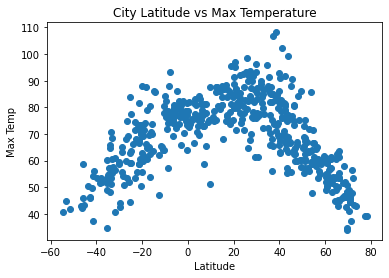

In [75]:
lat = clean_city_data['lat']
max_temp = clean_city_data['max_temp']

plt.scatter(lat, max_temp, marker='o')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('City Latitude vs Max Temperature')
plt.savefig('output_data/Lat_vs_MaxTemp.png')

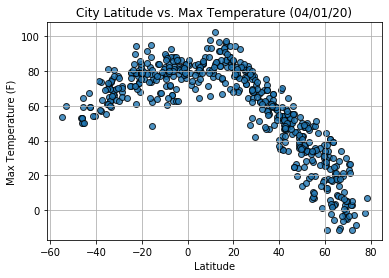

## Latitude vs. Humidity Plot

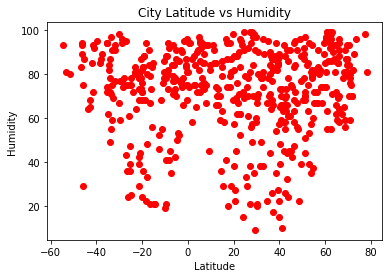

In [77]:
humidity = clean_city_data['humidity']

plt.scatter(lat, humidity, color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.savefig('output_data/Lat_vs_Humidity.png')


## Latitude vs. Cloudiness Plot

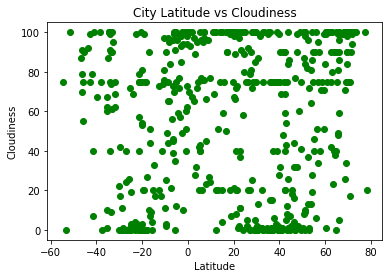

In [78]:
cloudiness = clean_city_data['cloudiness']
plt.scatter(lat, cloudiness, color='g')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
plt.savefig('output_data/Lat_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

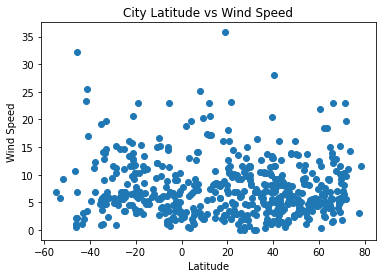

In [79]:
wind_speed = clean_city_data['wind_speed']
plt.scatter(lat, wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.savefig('output_data/Lat_vs_WindSpeed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
northern_hemisphere_df = clean_city_data.loc[clean_city_data['lat'] >= 0]
northern_hemisphere_df

,city,max_temp,humidity,wind_speed,cloudiness,lat,lng,country,date
0,Cherskiy,46.33,59,4.68,71,68.7500,161.3000,RU,1629149606
1,Barrow,37.42,75,23.02,90,71.2906,-156.7887,US,1629149606
3,Kapaa,84.52,67,5.01,1,22.0752,-159.3190,US,1629149607
5,Ratnagiri,76.78,87,3.98,100,16.9833,73.3000,IN,1629149607
6,Narsaq,50.22,99,0.34,100,60.9167,-46.0500,GL,1629149608
...,...,...,...,...,...,...,...,...,...
524,Abomey,73.15,85,7.20,100,7.1829,1.9912,BJ,1629149757
525,Qasigiannguit,46.65,91,5.08,100,68.8193,-51.1922,GL,1629149757
526,China,98.64,29,5.99,2,25.7000,-99.2333,MX,1629149678
527,Balabac,81.34,75,4.27,66,7.9868,117.0645,PH,1629149757


In [88]:
# deine lat and max temp for nothern hemisphere df
nh_lat = northern_hemisphere_df['lat']
nh_max_temp = northern_hemisphere_df['max_temp']

# Perform a linear regression on temperature vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nh_lat, nh_max_temp)

# Get regression values
regress_values = nh_lat * slope + intercept
print(regress_values)



0      55.598544
1      54.289852
3      79.641262
5      82.264157
6      59.633566
         ...    
524    87.312454
525    55.562847
526    77.774086
527    86.898356
528    54.512793
Name: lat, Length: 349, dtype: float64


In [89]:
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
print(line_eq)


y = -0.52x +91.01


The r-value is: 0.5037259498212547


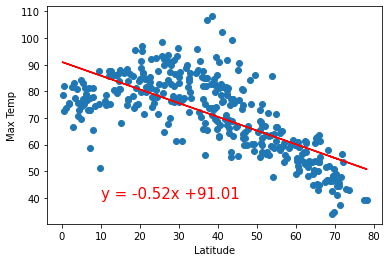

<Figure size 432x288 with 0 Axes>

In [90]:
# Create scatter plot
plt.scatter(nh_lat, nh_max_temp)
plt.plot(nh_lat, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, xy=(10,40), fontsize=15, color='red')

# print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig('output_data/Lat_vs_NH_MaxTemp_linregress.png')

The r-value is: 0.46937863826630627


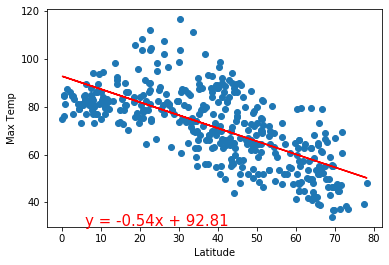

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [84]:
southern_hemisphere_df = clean_city_data.loc[clean_city_data['lat'] <= 0]
southern_hemisphere_df

,city,max_temp,humidity,wind_speed,cloudiness,lat,lng,country,date
2,Hobart,46.26,68,3.00,75,-42.8794,147.3294,AU,1629149405
4,Busselton,51.08,71,5.06,9,-33.6500,115.3333,AU,1629149607
8,Ushuaia,40.66,93,6.91,75,-54.8000,-68.3000,AR,1629149320
9,New Norfolk,45.91,65,1.99,99,-42.7826,147.0587,AU,1629149608
10,Port Alfred,70.70,55,13.87,74,-33.5906,26.8910,ZA,1629149609
...,...,...,...,...,...,...,...,...,...
498,Opuwo,64.56,48,3.38,0,-18.0607,13.8400,NA,1629149749
499,Departamento de Maldonado,57.22,84,5.82,100,-34.6667,-54.9167,UY,1629149486
504,Rantepao,65.70,91,1.86,93,-2.9701,119.8978,ID,1629149750
511,Morros,78.67,21,5.57,2,-9.4467,-46.3003,BR,1629149753


In [91]:
# deine lat and max temp for nothern hemisphere df
sh_lat = southern_hemisphere_df['lat']
sh_max_temp = southern_hemisphere_df['max_temp']

# Perform a linear regression on temperature vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(sh_lat, sh_max_temp)

# Get regression values
regress_values = sh_lat * slope + intercept
print(regress_values)

2      49.312907
4      56.155260
8      40.475392
9      49.384671
10     56.199297
         ...    
498    67.712619
499    55.401514
504    78.900260
511    74.098736
512    71.637405
Name: lat, Length: 174, dtype: float64


In [92]:
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = 0.74x +81.1


The r-value is: 0.6100228825594071


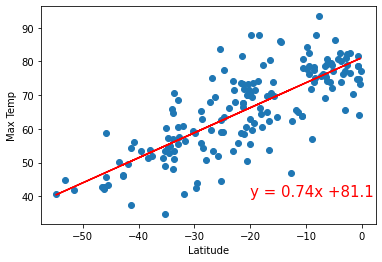

<Figure size 432x288 with 0 Axes>

In [93]:
# Create scatter plot
plt.scatter(sh_lat, sh_max_temp)
plt.plot(sh_lat, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, xy=(-20,40), fontsize=15, color='red')

# print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig('output_data/Lat_vs_SH_MaxTemp_linregress.png')

The r-value is: 0.6082708688906918


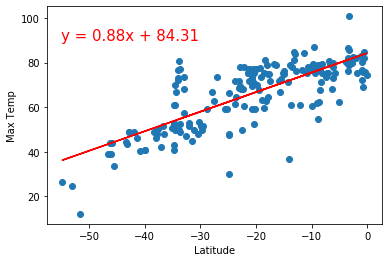

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [94]:
# deine lat and max temp for nothern hemisphere df
nh_humidity = northern_hemisphere_df['humidity']

# Perform a linear regression on temperature vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nh_lat, nh_humidity)

# Get regression values
regress_values = nh_lat * slope + intercept
print(regress_values)

0      74.452874
1      74.632513
3      71.152623
5      70.792589
6      73.899002
         ...    
524    70.099629
525    74.457774
526    71.408923
527    70.156470
528    74.601910
Name: lat, Length: 349, dtype: float64


In [95]:
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = 0.07x +69.59


The r-value is: 0.0049064269898865115


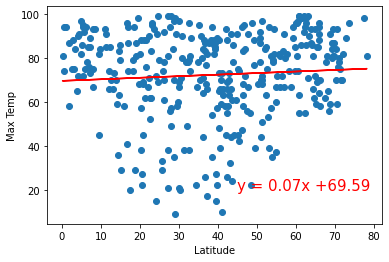

<Figure size 432x288 with 0 Axes>

In [96]:
# Create scatter plot
plt.scatter(nh_lat, nh_humidity)
plt.plot(nh_lat, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, xy=(45,20), fontsize=15, color='red')

# print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig('output_data/Lat_vs_NH_Humidity_linregress.png')

The r-value is: 0.000543987878808455


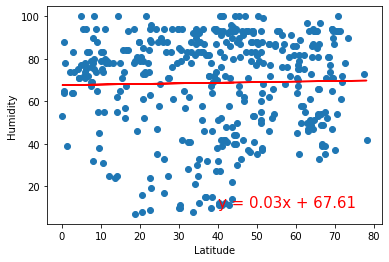

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [97]:
# deine lat and max temp for nothern hemisphere df
sh_humidity = southern_hemisphere_df['humidity']

# Perform a linear regression on temperature vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(sh_lat, sh_humidity)

# Get regression values
regress_values = sh_lat * slope + intercept
print(regress_values)

2      75.020847
4      73.562743
8      76.904120
9      75.005554
10     73.553358
         ...    
498    71.099871
499    73.723366
504    68.715787
511    69.738991
512    70.263500
Name: lat, Length: 174, dtype: float64


In [98]:
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = -0.16x +68.25


The r-value is: 0.011561525370443318


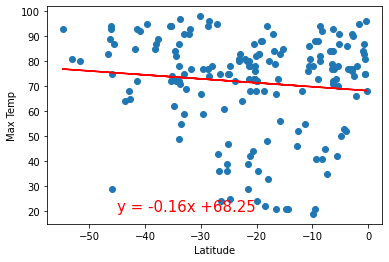

<Figure size 432x288 with 0 Axes>

In [99]:
# Create scatter plot
plt.scatter(sh_lat, sh_humidity)
plt.plot(sh_lat, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, xy=(-45,20), fontsize=15, color='red')

# print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig('output_data/Lat_vs_SH_Humidity_linregress.png')

The r-value is: 0.014985174297345524


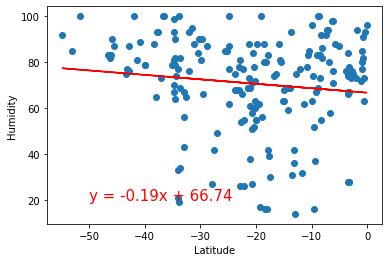

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [100]:
# deine lat and max temp for nothern hemisphere df
nh_cloudiness = northern_hemisphere_df['cloudiness']

# Perform a linear regression on temperature vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nh_lat, nh_cloudiness)

# Get regression values
regress_values = nh_lat * slope + intercept
print(regress_values)

0      62.189275
1      62.616726
3      54.336336
5      53.479634
6      60.871338
         ...    
524    51.830737
525    62.200935
526    54.946201
527    51.965991
528    62.543908
Name: lat, Length: 349, dtype: float64


In [101]:
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = 0.17x +50.62


The r-value is: 0.007520384544958427


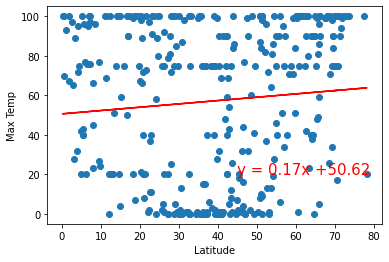

<Figure size 432x288 with 0 Axes>

In [102]:
# Create scatter plot
plt.scatter(nh_lat, nh_cloudiness)
plt.plot(nh_lat, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, xy=(45,20), fontsize=15, color='red')

# print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig('output_data/Lat_vs_NH_Cloudiness_linregress.png')

The r-value is: 0.0020898727664228514


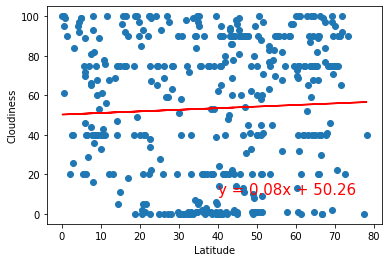

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [103]:
# deine lat and max temp for nothern hemisphere df
sh_cloudiness = southern_hemisphere_df['cloudiness']

# Perform a linear regression on temperature vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(sh_lat, sh_cloudiness)

# Get regression values
regress_values = sh_lat * slope + intercept
print(regress_values)

2      49.001414
4      49.790314
8      47.982477
9      49.009688
10     49.795392
         ...    
498    51.122840
499    49.703410
504    52.412738
511    51.859138
512    51.575354
Name: lat, Length: 174, dtype: float64


In [104]:
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = 0.09x +52.67


The r-value is: 0.0009655918419118954


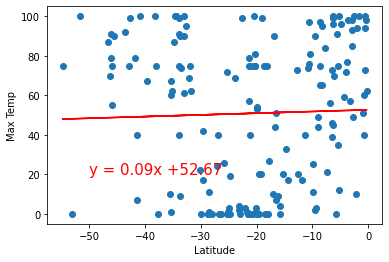

<Figure size 432x288 with 0 Axes>

In [105]:
# Create scatter plot
plt.scatter(sh_lat, sh_cloudiness)
plt.plot(sh_lat, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, xy=(-50,20), fontsize=15, color='red')

# print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig('output_data/Lat_vs_SH_cloudiness_linregress.png')

The r-value is: 0.0035263772085582894


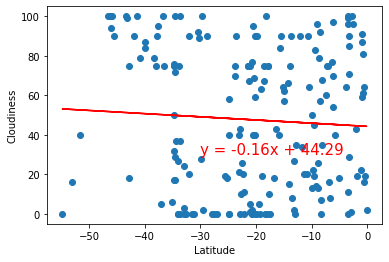

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [106]:
# deine lat and max temp for nothern hemisphere df
nh_wind_speed = northern_hemisphere_df['wind_speed']

# Perform a linear regression on temperature vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nh_lat, nh_wind_speed)

# Get regression values
regress_values = nh_lat * slope + intercept
print(regress_values)

0      7.393834
1      7.388860
3      7.485211
5      7.495179
6      7.409169
         ...   
524    7.514366
525    7.393698
526    7.478114
527    7.512792
528    7.389707
Name: lat, Length: 349, dtype: float64


In [107]:
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = -0.0x +7.53


The r-value is: 5.703069837198048e-05


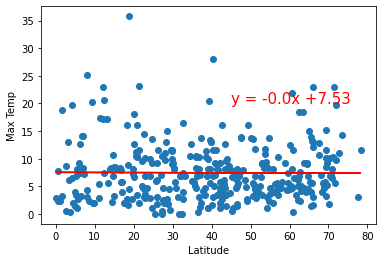

<Figure size 432x288 with 0 Axes>

In [108]:
# Create scatter plot
plt.scatter(nh_lat, nh_wind_speed)
plt.plot(nh_lat, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, xy=(45,20), fontsize=15, color='red')

# print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig('output_data/Lat_vs_NH_WindSpeed_linregress.png')

The r-value is: 0.04019723576144484


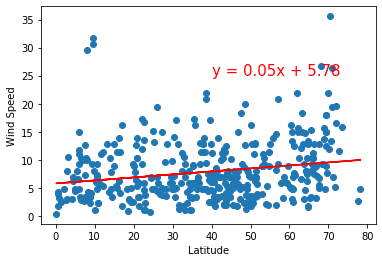

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [109]:
# deine lat and max temp for nothern hemisphere df
sh_wind_speed = southern_hemisphere_df['wind_speed']

# Perform a linear regression on temperature vs latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(sh_lat, sh_wind_speed)

# Get regression values
regress_values = sh_lat * slope + intercept
print(regress_values)

2      9.051756
4      8.560267
8      9.686559
9      9.046601
10     8.557103
         ...   
498    7.730096
499    8.614409
504    6.926483
511    7.271378
512    7.448177
Name: lat, Length: 174, dtype: float64


In [110]:
# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = -0.05x +6.77


The r-value is: 0.018170319285255445


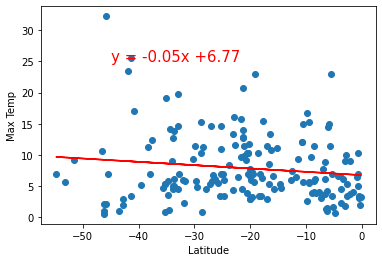

<Figure size 432x288 with 0 Axes>

In [111]:
# Create scatter plot
plt.scatter(sh_lat, sh_wind_speed)
plt.plot(sh_lat, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, xy=(-45,25), fontsize=15, color='red')

# print r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.savefig('output_data/Lat_vs_SH_WindSpeed_linregress.png')

The r-value is: 0.017128274759839232


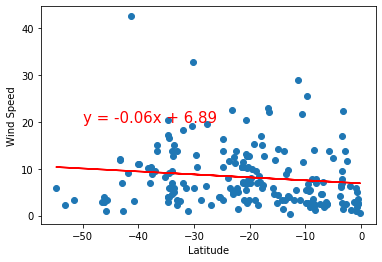